# 2024-1 머신러닝개론 HW#1
## 2022104346 정지헌
### Coordinate Descent Algorithm 구현 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import math_optimization_library as optlib
from typing import Callable

g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

## 과제: Coordinate Descent Algorithm

In [2]:
def coordinate_descent(
        g: Callable[[np.ndarray], np.ndarray], 
        w: np.ndarray, 
        max_iterations: int,
        alpha: float):
    
    g_history = []
    w_history = []

    directions_array = np.concatenate(
        (np.eye(np.size(w), np.size(w)), 
        -np.eye(np.size(w), np.size(w)),),
        axis = 0
    )
    """ Creates something like
      [[ 1,  0],
       [ 0,  1],
       [-1, -0],
       [-0, -1]] if size(w) == 2,
      [[ 1,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  1],
       [-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]] if size(w) == 3"""

    for i in range(max_iterations):
        w_history.append(w)
        g_history.append(g(w))

        for j in range(np.size(w)):
            # iterate for the number of coordinates
            cur_dir_idxs = [j, j + np.size(w)]
            # A list of two indexes that each corresponds to the positive and negative directions of a single coordinate
            # (0, 2), (1, 3) if size(w) == 2, 
            # (0, 3), (1, 4), (2, 5) if size(w) == 3

            w_candidates = directions_array[cur_dir_idxs] * alpha + w
            g_candidates = np.array([g(k) for k in w_candidates])
            min_candidate_idx = np.argmin(g_candidates)
            if g_candidates[min_candidate_idx] < g_history[-1]:
                # if the smallest g_candidate is actually smaller than current g
                w = w_candidates[min_candidate_idx]
        
    w_history.append(w)
    g_history.append(g(w))

    return w_history, g_history

### Coordinate Descent Algorithm 실행 결과

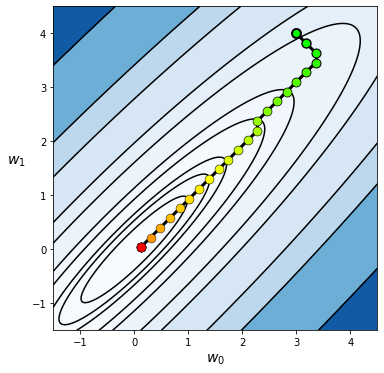

In [3]:
# run coordinate descent algorithm 
w = np.array([3,4]); max_its = 30
weight_history_1,cost_history_1 = coordinate_descent(g, w, max_its, 0.18)


# show run in both three-dimensions and just the input space via the contour plot
static_plotter = optlib.static_plotter.Visualizer()
static_plotter.two_input_contour_plot(g,weight_history_1,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 25,show_original = False)

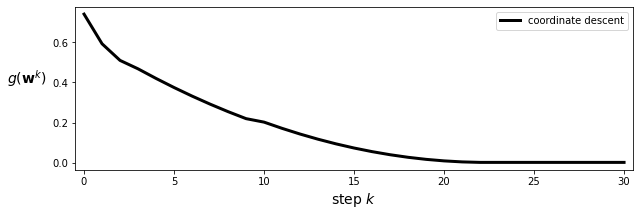

In [4]:
static_plotter.plot_cost_histories([cost_history_1],start = 0,points = False,labels = ['coordinate descent'])

약 22회의 iteration 후에 수렴한 모습을 확인할 수 있다.

## 예제: Coordinate Search Algorithm

In [5]:
# zero order coordinate search
def coordinate_search(g,w, max_its, alpha):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    for k in range(1,max_its+1):    
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

### 예제 Coordinate Search Algorithm 실행 결과

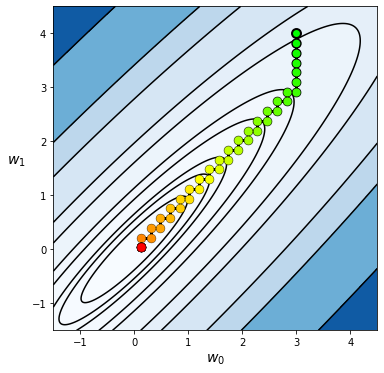

In [6]:
# run coordinate search algorithm 
w = np.array([3,4]); max_its = 50
weight_history_1,cost_history_1 = coordinate_search(g, w, max_its, 0.18)


# show run in both three-dimensions and just the input space via the contour plot
static_plotter = optlib.static_plotter.Visualizer()
static_plotter.two_input_contour_plot(g,weight_history_1,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 25,show_original = False)

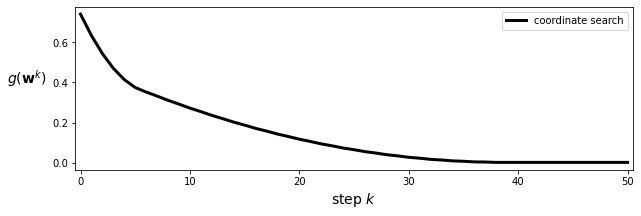

In [7]:
static_plotter.plot_cost_histories([cost_history_1],start = 0,points = False,labels = ['coordinate search'])

37회의 iteration 후 수렴하였다.